# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

In [ ]:
!pip3 install scikit-learn

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [16]:
import os
import matplotlib.pyplot as plt
if os.name == 'posix':
    plt.rc("font", family = "AppleGothic")
else:
    plt.rc("font", family = "Malgun Gothic")

In [4]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# 결측치 확인 및 처리 --> 결측치가 없기 때문에 제거하는 단계 생략
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
# 중복값을 검사 및 처리 --> 중복된 값도 없기 때문에 제거하는 단계를 생략
df.duplicated().sum() 

0

In [12]:
#상관 계수 계산을 통한 column별 관계성 파악
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


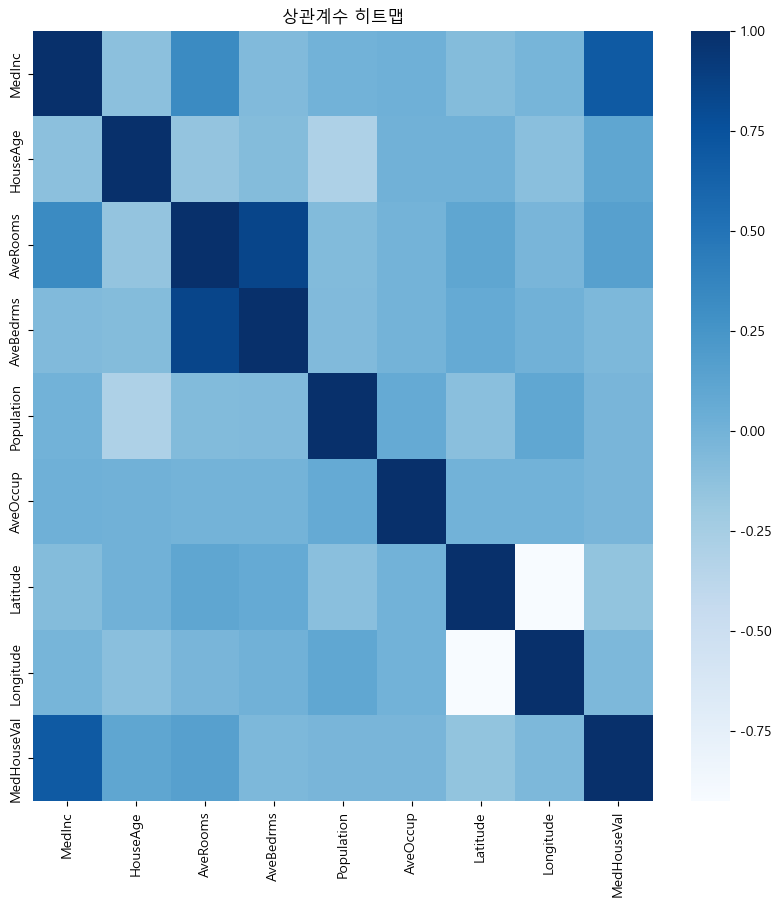

In [35]:
plt.rcParams['axes.unicode_minus'] = False #마이너스 부호 에러를 방지하는 코드

plt.figure(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues')
plt.title("상관계수 히트맵")
plt.show()

#상관 계수의 hitmap을 통해 2가지 특징을 확인할 수 있다
#1. Latitude와 Longitude, 즉 위도와 경도는 강한 음의 상관 관계가 있다
#2. AveRooms와 AveBedrms는 강한 양의 상관 관계가 있다. (주택 1가구당 평균 방의 수와 주택 1 가구당 평균 침실의 수이므로 방이 많을 수록 침실도 많을 확률이 높기 때문으로 예측된다)

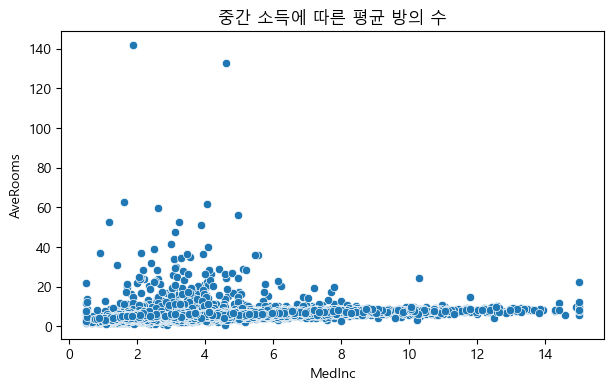

In [27]:
# 이상치 탐지 (시각화, or scaler 사용)

#1. MedInc에 따른 AveRooms를 산점도로 표시하여 이상치를 탐색한다
plt.figure(figsize=(7,4))
plt.title("중간 소득에 따른 평균 방의 수")
sns.scatterplot(x=df['MedInc'], y=df['AveRooms'])
plt.show()

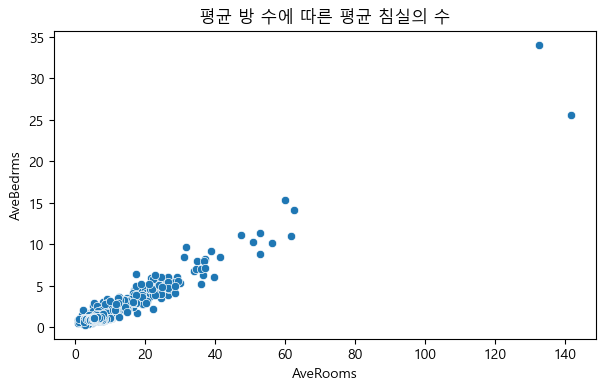

In [30]:
#2. AveRooms에 따른 AveBedrms의 산점도를 통해 이상치 확인
#상관 계수 히트맵에서 보았듯 AveRooms와 AveBedrms 사이의 강한 양의 상관 관계가 보이는데 2개의 지점에서 이상치가 발견된다(1번에서 발견된 이상치와 동일)
plt.figure(figsize=(7,4))
plt.title("평균 방 수에 따른 평균 침실의 수")
sns.scatterplot(x=df['AveRooms'], y=df['AveBedrms'])
plt.show()

In [40]:
#이상치로 여겨지는 2 포인트는 모두 AveRooms가 120이 초과함을 위의 산점도를 통해 확인할 수 있다. 따라서 아래와 같은 코드로 해당 row를 탐색한다
print(len(df), end = "\n\n") #이상치 제거 이전 row의 수를 확인 --> 2개를 없앨 것이기 때문에 drop 이후 len(df)는 20638이 되어야 한다
df[df['AveRooms'] > 120]

20640



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [45]:
df.drop(df[df['AveRooms'] > 120].index, axis=0, inplace=True)

print(len(df)) #예상대로 이상치 2개가 제거되어 len(df)가 20638이 되었다

20638


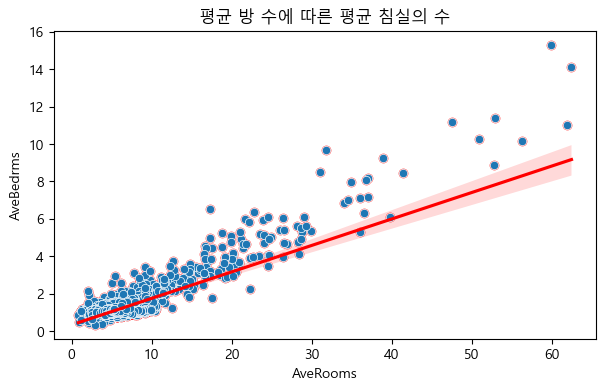

In [48]:
#이상치 제거 이후 산점도 다시 그려보기
plt.figure(figsize=(7,4))
plt.title("평균 방 수에 따른 평균 침실의 수")
sns.regplot(x=df['AveRooms'], y=df['AveBedrms'], color='red') #산점도의 추세선(trendline)을 그려서 AveRooms와 AveBedrms의 상관성을 명시적으로 보여준다
sns.scatterplot(x=df['AveRooms'], y=df['AveBedrms'])
plt.show()

In [51]:
# 1번 산점도 그래프(MedInc, AveRooms)가 아래쪽에 치우쳐저 있기 때문에 데이터 정규화를 수행할 필요가 있어보인다.
selected1 = df['MedInc']
selected2 = df['AveRooms']

# 평균과 표준편차 계산
mean1 = selected1.mean()
std1 = selected1.std()

mean2 = selected2.mean()
std2 = selected2.std()

# Z-Score Normalization 수행
normalized1 = (selected1 - mean1) / std1
normalized2 = (selected2 - mean2) / std2

# 정규화된 열로 새로운 데이터프레임을 생성
normalized_df = pd.DataFrame({'N_MedInc': normalized1, 'N_AveRooms': normalized2})
normalized_df

,N_MedInc,N_AveRooms
0,2.344635,0.744383
1,2.332108,0.390213
2,1.782593,1.363480
3,0.932897,0.190439
4,-0.012912,0.410968
...,...,...
20635,-1.216109,-0.176030
20636,-0.691595,0.331294
20637,-1.142577,-0.100026
20638,-1.054570,-0.041169


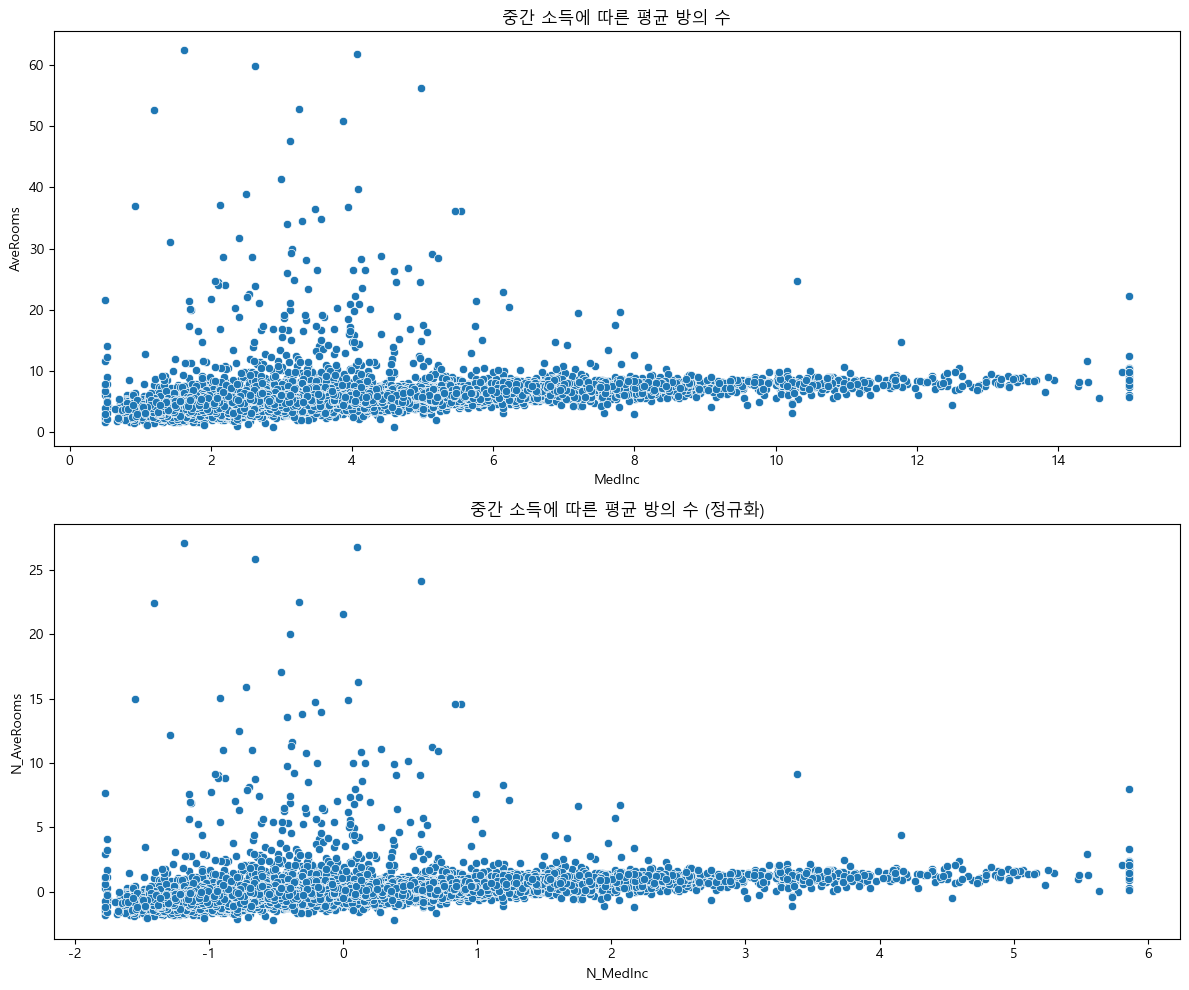

In [63]:
#정규화한 이후의 데이터를 바탕으로 그래프를 그리되 기존에 정규화 하지 않은 그래프와 비교할 수 있도록 subplot을 활용하여 위 아래에 두 그래프가 배치되도록 하였다.

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1, title = '중간 소득에 따른 평균 방의 수')
sns.scatterplot(x=df['MedInc'], y=df['AveRooms'])

plt.subplot(2, 1, 2, title = '중간 소득에 따른 평균 방의 수 (정규화)')
sns.scatterplot(data=normalized_df, x=normalized_df['N_MedInc'], y=normalized_df['N_AveRooms'])

plt.tight_layout() # 그냥 그래프를 그리면 두 그래프가 겹칠 수 있다. 이를 방지하기 위한 코드
plt.show()


### Tip: scaler 사용 방법
간단한 사용법은 아래와 같습니다. 필수사항은 아니기에 관심있으시면 공부해보시는 것을 추천드립니다.

In [ ]:
# 이를 위해 pip install scikit-learn 을 해야 할 수 있습니다.

# Z score Scaler 사용법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

# Min-Max Scaler 사용법
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입